
Index No: 249321V 

Name: HDPR PERERA

In [29]:
# !pip install opencv-python
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

import warnings
warnings.filterwarnings('ignore')

#### Question 01

In [11]:
t1 = np.linspace(0, 49, 50).astype('uint8')
t2 = np.linspace(100, 254, 100).astype('uint8')
t3 = np.linspace(150, 255, 106).astype('uint8')

print(t1)
print(t2)
print(t3)

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[100 101 103 104 106 107 109 110 112 114 115 117 118 120 121 123 124 126
 128 129 131 132 134 135 137 138 140 142 143 145 146 148 149 151 152 154
 156 157 159 160 162 163 165 166 168 170 171 173 174 176 177 179 180 182
 184 185 187 188 190 191 193 194 196 198 199 201 202 204 205 207 208 210
 212 213 215 216 218 219 221 222 224 226 227 229 230 232 233 235 236 238
 240 241 243 244 246 247 249 250 252 254]
[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]
256


In [13]:
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)


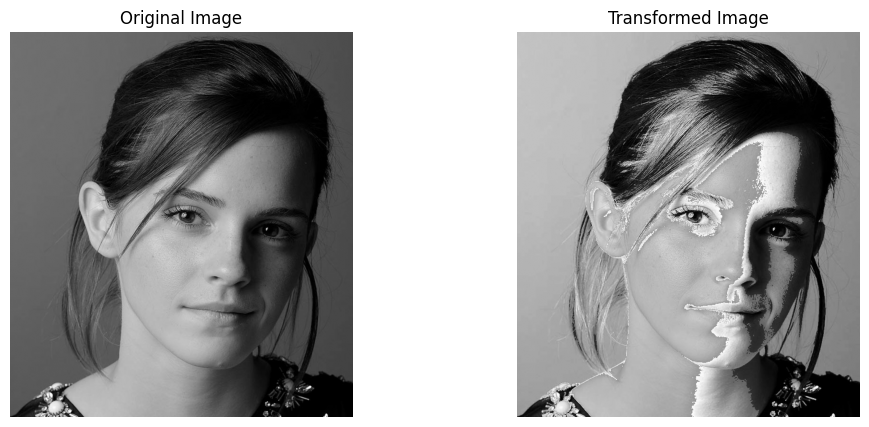

In [15]:
# Plot original vs transformed
plt.figure(figsize=(12,5))

# Original
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Transformed
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()

#### Question 02

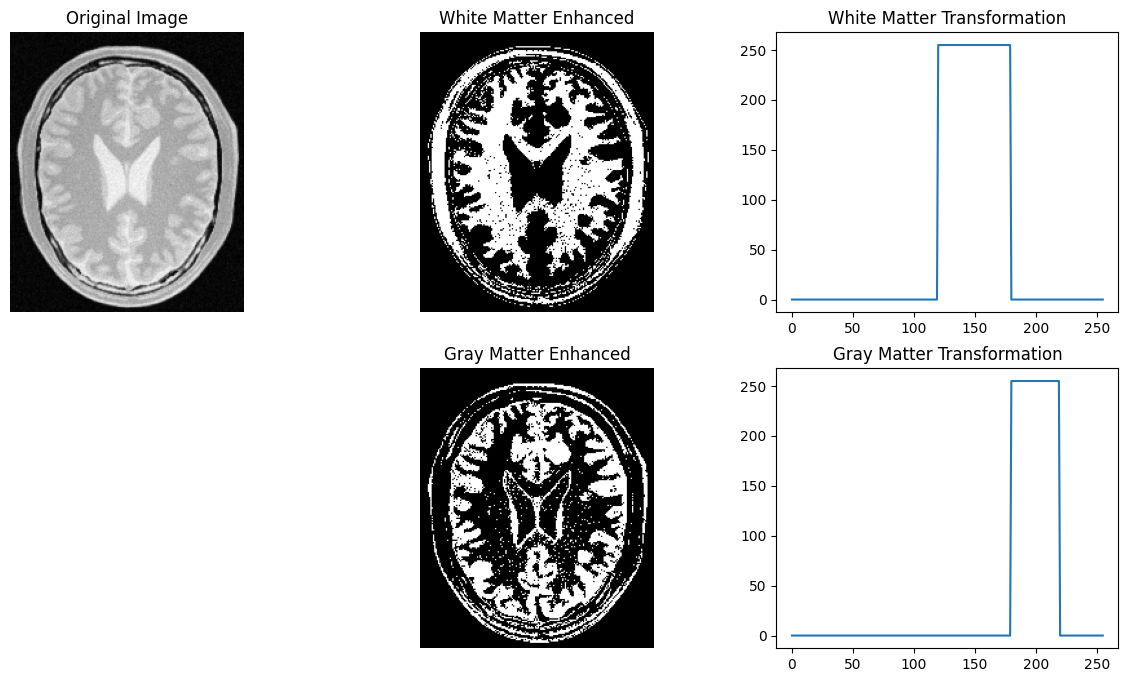

In [32]:
img = cv.imread('images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# (a) Enhance White Matter 
w1 = np.linspace(0, 0, 120).astype('uint8')
w2 = np.linspace(255, 255, 60).astype('uint8')
w3 = np.linspace(0, 0, 76).astype('uint8')
transform_white = np.concatenate((w1, w2, w3), axis=0).astype('uint8')
img_white = cv.LUT(img, transform_white)

# (b) Enhance Gray Matter
g1 = np.linspace(0, 0, 180).astype('uint8')
g2 = np.linspace(255, 255, 40).astype('uint8')
g3 = np.linspace(0, 0, 36).astype('uint8')
transform_gray = np.concatenate((g1, g2, g3), axis=0).astype('uint8')
img_gray = cv.LUT(img, transform_gray)

plt.figure(figsize=(15,8))

# Original
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# White matter
plt.subplot(2, 3, 2)
plt.imshow(img_white, cmap='gray')
plt.title("White Matter Enhanced")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.plot(transform_white)
plt.title("White Matter Transformation")

# Gray matter
plt.subplot(2, 3, 5)
plt.imshow(img_gray, cmap='gray')
plt.title("Gray Matter Enhanced")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.plot(transform_gray)
plt.title("Gray Matter Transformation")

plt.show()

#### Question 3

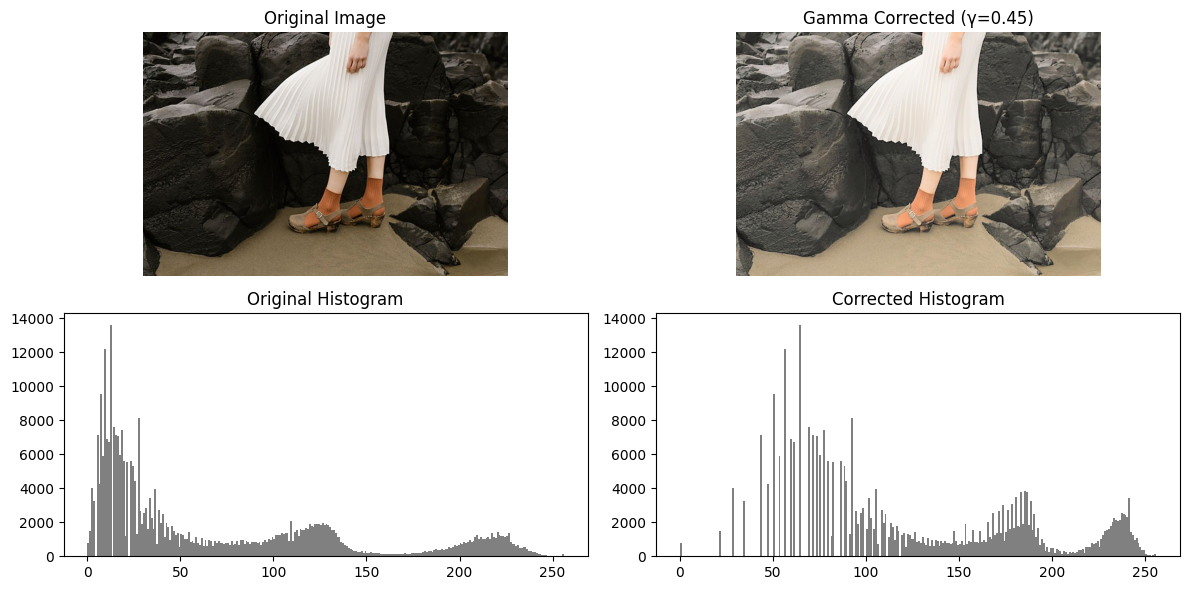

In [59]:
img_org = cv.imread("images/highlights_and_shadows.jpg")
img = cv.cvtColor(img_org, cv.COLOR_BGR2LAB)
gamma = 0.45 

# split into L, a, b
L, a, b = cv.split(img)

# apply gamma correction
L_normalized = L / 255.0
L_gamma = np.power(L_normalized, gamma)
L_corrected = np.uint8(L_gamma * 255)

corrected_img = cv.merge([L_corrected, a, b])
corrected_img_bgr = cv.cvtColor(corrected_img, cv.COLOR_LAB2BGR)

# ---- Show Histograms ----
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(corrected_img_bgr, cv.COLOR_BGR2RGB))
plt.title(f"Gamma Corrected (γ={gamma})")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(L.ravel(), 256, [0,256], color='gray')
plt.title("Original Histogram")

plt.subplot(2,2,4)
plt.hist(L_corrected.ravel(), 256, [0,256], color='gray')
plt.title("Corrected Histogram")

plt.tight_layout()
plt.show()

#### Question 4

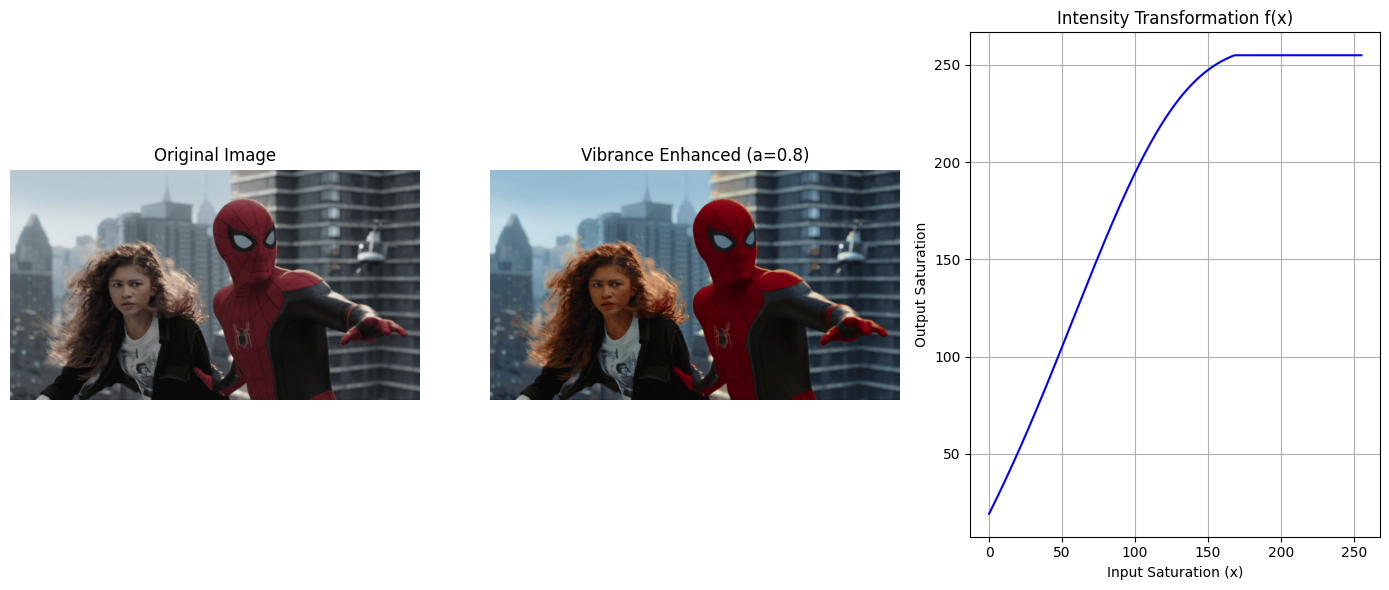

In [73]:
img = cv.imread("images/spider.png")
sigma = 70
a = 0.8  

# split the image to H,S, V planes
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# apply transformation to saturation plane
x = np.arange(256)
f_x = np.minimum(x + a * 128 * np.exp(-((x-128)**2) / (2*sigma**2)), 255)
s_transformed = f_x[s]

# recombine three planes
hsv_enhanced = cv.merge([h, s_transformed.astype(np.uint8), v])
img_enhanced = cv.cvtColor(hsv_enhanced, cv.COLOR_HSV2BGR)


# ---- Display Results ----
plt.figure(figsize=(14,6))

# Original image
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Vibrance enhanced
plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(img_enhanced, cv.COLOR_BGR2RGB))
plt.title(f"Vibrance Enhanced (a={a})")
plt.axis("off")

# intensity ransformation curve
plt.subplot(1,3,3)
plt.plot(x, f_x, color='blue')
plt.title("Intensity Transformation f(x)")
plt.xlabel("Input Saturation (x)")
plt.ylabel("Output Saturation")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Question 5 - not completed

In [ ]:
# (a) Load image and split into HSV planes
img = cv.imread('images/jeniffer.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# Display HSV planes
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(h, cmap='gray'); plt.title('Hue')
plt.subplot(1,3,2); plt.imshow(s, cmap='gray'); plt.title('Saturation')
plt.subplot(1,3,3); plt.imshow(v, cmap='gray'); plt.title('Value')
plt.show()

# (b) Threshold to extract foreground (example: using value plane)
_, mask = cv.threshold(v, 150, 255, cv.THRESH_BINARY)  # adjust 128 if needed

# Display mask
plt.imshow(mask, cmap='gray'); plt.title('Foreground Mask'); plt.show()



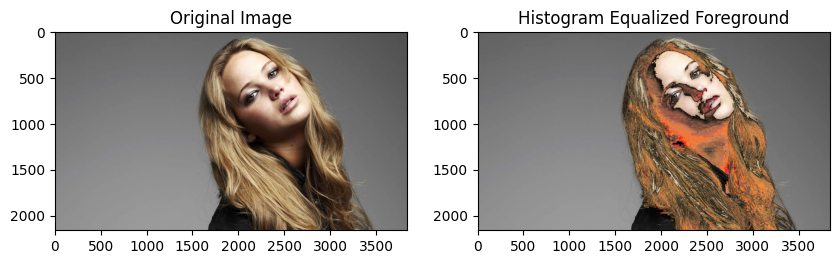

In [ ]:
# (c) Extract foreground using mask
foreground = cv.bitwise_and(v, v, mask=mask)

# Compute histogram of foreground
hist = cv.calcHist([foreground], [0], mask, [256], [0,256])

# (d) Cumulative sum
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]  # normalize to 0-255

# (e) Histogram equalization on foreground
foreground_eq = cv.LUT(foreground, cdf_normalized.astype('uint8'))

# (f) Combine with background
background = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))
result_v = cv.add(background, foreground_eq)

# Merge back HSV
result_hsv = cv.merge([h, s, result_v])
result_img = cv.cvtColor(result_hsv, cv.COLOR_HSV2BGR)

# Show original and result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)); plt.title('Original Image')
plt.subplot(1,2,2); plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB)); plt.title('Histogram Equalized Foreground')
plt.show()

#### Question 6

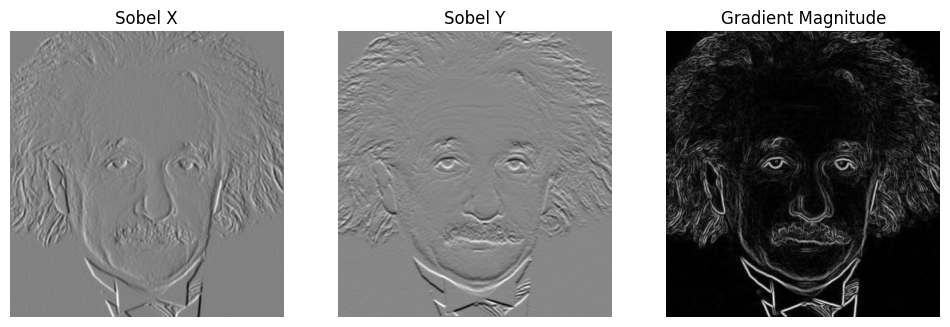

In [9]:
img = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE)

# --------- (a) Using filter2D ------------------
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

grad_x = cv.filter2D(img, cv.CV_64F, sobel_x)
grad_y = cv.filter2D(img, cv.CV_64F, sobel_y)

grad_mag = cv.magnitude(grad_x, grad_y)


plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(grad_x, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grad_y, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(grad_mag, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.show()


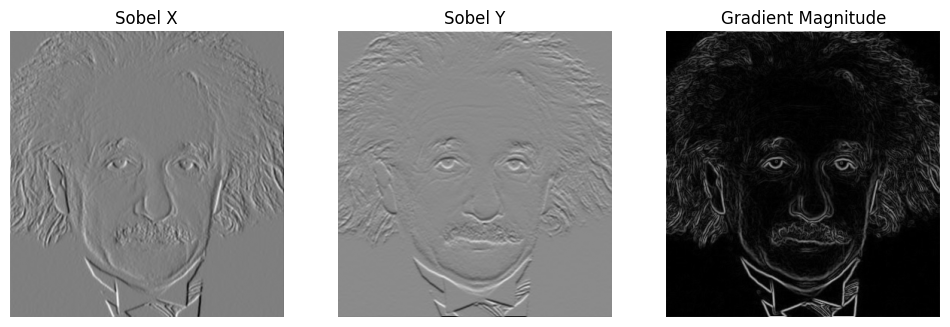

In [14]:
# --- (b) Manual convolution (own code) ---
def convolution(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2
    padded = np.pad(image, ((pad_h,pad_h),(pad_w,pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=np.float32)
    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i,j] = np.sum(region * kernel)
    return output

grad_x_b = convolution(img, sobel_x)
grad_y_b = convolution(img, sobel_y)
grad_mag_b = np.sqrt(grad_x_b**2 + grad_y_b**2)



plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(grad_x_b, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grad_y_b, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(grad_mag_b, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.show()

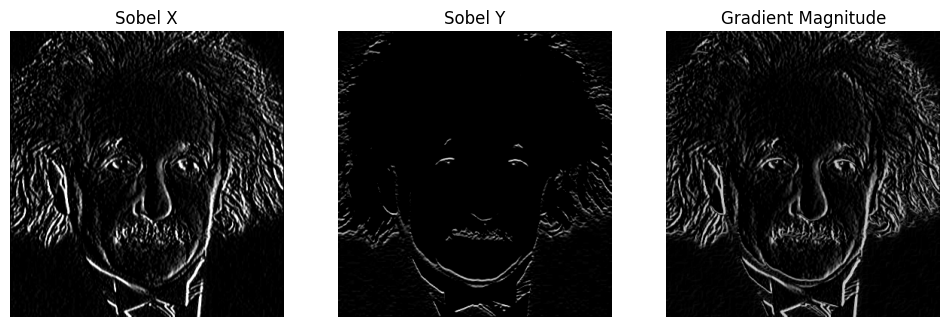

In [ ]:
# ------ (c) Using separability ----------  seems incorrect
# Vertical and horizontal vectors
v = np.array([[1],[2],[1]], dtype=np.float32)   # horizontal derivative
h = np.array([[1,0,-1]], dtype=np.float32)     # vertical smoothing

# Step 1: horizontal convolution
temp = cv.filter2D(img, -1, h)
# Step 2: vertical convolution
grad_x_c = cv.filter2D(temp, -1, v)

# Similarly for Sobel Y, just swap v and h
# temp_y = cv.filter2D(img, -1, v.T)
# grad_y_c = cv.filter2D(temp_y, -1, v)
h_smooth = np.array([[1,2,1]], dtype=np.float32)   # horizontal smoothing
v_deriv = np.array([[1],[0],[-1]], dtype=np.float32)  # vertical derivative

temp_y = cv.filter2D(img, -1, h_smooth)          # smooth horizontally
grad_y_c = cv.filter2D(temp_y, -1, v_deriv)      # derivative vertically

grad_mag_c = cv.magnitude(grad_x_c.astype(np.float32), grad_y_c.astype(np.float32))

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(grad_x_c, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grad_y_c, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(grad_mag_c, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.show()

#### Question 7

In [2]:
# -------------------
# Nearest Neighbor Interpolation
# -------------------
def zoom_nearest(img, s):
    h, w = img.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    output = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
    
    for i in range(new_h):
        for j in range(new_w):
            # Map back to nearest neighbor
            x = int(i / s)
            y = int(j / s)
            output[i, j] = img[x, y]
    return output

# -------------------
# Bilinear Interpolation
# -------------------
def zoom_bilinear(img, s):
    h, w = img.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    output = np.zeros((new_h, new_w, img.shape[2]), dtype=np.float32)

    for i in range(new_h):
        for j in range(new_w):
            # Map back
            x = i / s
            y = j / s

            x0, y0 = int(np.floor(x)), int(np.floor(y))
            x1, y1 = min(x0+1, h-1), min(y0+1, w-1)

            dx, dy = x - x0, y - y0

            # Bilinear interpolation
            top = (1-dy)*img[x0,y0] + dy*img[x0,y1]
            bottom = (1-dy)*img[x1,y0] + dy*img[x1,y1]
            output[i,j] = (1-dx)*top + dx*bottom
    
    return np.clip(output,0,255).astype(np.uint8)

# -------------------
# Normalized SSD
# -------------------
def normalized_ssd(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    ssd = np.sum((img1 - img2) ** 2)
    norm_ssd = ssd / np.sum(img1 ** 2)
    return norm_ssd


In [ ]:
# -------------------
# Example Test
# -------------------
# Load images (original and zoomed-out versions)
orig = cv.imread("images/a1q8images/taylor.jpg")        # Original large image
small = cv.imread("images/a1q8images/taylor_very_small.jpg")          # Zoomed-out version

# Scale-up the small image by factor of 4
scaled_nn = zoom_nearest(small, 20)
scaled_bi = zoom_bilinear(small, 20)

# Compute SSD
ssd_nn = normalized_ssd(orig, scaled_nn)
ssd_bi = normalized_ssd(orig, scaled_bi)

print("Normalized SSD (Nearest Neighbor):", ssd_nn)
print("Normalized SSD (Bilinear):", ssd_bi)

# Show results in 3 rows
plt.figure(figsize=(8,12))

plt.subplot(3,1,1)
plt.imshow(cv.cvtColor(orig, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(3,1,2)
plt.imshow(cv.cvtColor(scaled_nn, cv.COLOR_BGR2RGB))
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(3,1,3)
plt.imshow(cv.cvtColor(scaled_bi, cv.COLOR_BGR2RGB))
plt.title("Bilinear")
plt.axis("off")

plt.tight_layout()
plt.show()

#### Question 8

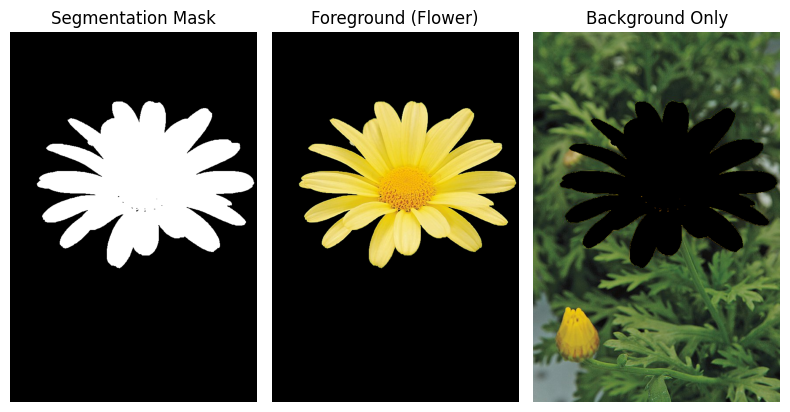

In [ ]:
img = cv.imread("images/daisy.jpg")   
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# ------- (a) Segment the image ---------
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# define a rectangle around the flower
x1 = 50
y1 = 136
y2 = 557
rect = (x1, 136, img.shape[1]-x1, y2-y1)  # (x,y,w,h)

cv.grabCut(img_rgb, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Create final mask: 1 (foreground), 0 (background)
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# Extract foreground and background
foreground = img_rgb * mask2[:, :, np.newaxis]
background = img_rgb * (1 - mask2[:, :, np.newaxis])


plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title("Segmentation Mask")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(foreground)
plt.title("Foreground (Flower)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(background)
plt.title("Background Only")
plt.axis("off")

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(560.5), np.float64(840.5), np.float64(-0.5))

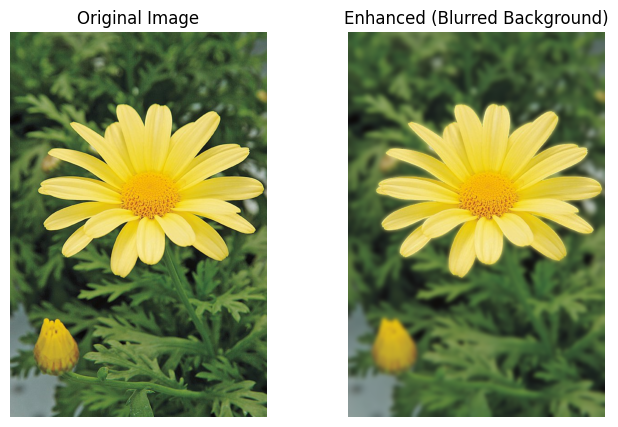

In [25]:
# ---- (b) Enhanced image with a blurred background. ----

blurred_bg = cv.GaussianBlur(img_rgb, (25, 25), 0)  # blur full image
blurred_combined = blurred_bg * (1 - mask2[:, :, np.newaxis]) + foreground

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_combined.astype(np.uint8))
plt.title("Enhanced (Blurred Background)")
plt.axis("off")


#### Question 9

In [ ]:

# Load images
img_gaussian = cv.imread('/mnt/data/0b677385-6b06-46e9-8e04-28bb2e2b3515.png', cv.IMREAD_GRAYSCALE)
img_saltpepper = img_gaussian.copy()  # Replace with your salt-and-pepper image if different

# --- (a) Gaussian noise removal ---
img_gaussian_denoised = cv.GaussianBlur(img_gaussian, (5,5), 0)

# --- (b) Salt-and-pepper noise removal ---
img_saltpepper_denoised = cv.medianBlur(img_saltpepper, 5)

# --- (c) Otsu's thresholding ---
_, thresh_gaussian = cv.threshold(img_gaussian_denoised, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, thresh_saltpepper = cv.threshold(img_saltpepper_denoised, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# --- (d) Morphological operations ---
# Remove small objects and fill holes
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))

# For Gaussian image
morph_gaussian = cv.morphologyEx(thresh_gaussian, cv.MORPH_OPEN, kernel, iterations=2)
morph_gaussian = cv.morphologyEx(morph_gaussian, cv.MORPH_CLOSE, kernel, iterations=2)

# For Salt-and-Pepper image
morph_saltpepper = cv.morphologyEx(thresh_saltpepper, cv.MORPH_OPEN, kernel, iterations=2)
morph_saltpepper = cv.morphologyEx(morph_saltpepper, cv.MORPH_CLOSE, kernel, iterations=2)

# --- (e) Connected components for counting ---
num_labels_gaussian, labels_im_gaussian = cv.connectedComponents(morph_gaussian)
num_labels_saltpepper, labels_im_saltpepper = cv.connectedComponents(morph_saltpepper)

# Subtract 1 because background is also counted
print("Number of rice grains (Gaussian image):", num_labels_gaussian - 1)
print("Number of rice grains (Salt-and-Pepper image):", num_labels_saltpepper - 1)

# Optional: visualize
plt.figure(figsize=(12,6))
plt.subplot(2,2,1); plt.imshow(img_gaussian_denoised, cmap='gray'); plt.title('Gaussian Denoised')
plt.subplot(2,2,2); plt.imshow(morph_gaussian, cmap='gray'); plt.title('Gaussian Morphology')
plt.subplot(2,2,3); plt.imshow(img_saltpepper_denoised, cmap='gray'); plt.title('Salt-Pepper Denoised')
plt.subplot(2,2,4); plt.imshow(morph_saltpepper, cmap='gray'); plt.title('Salt-Pepper Morphology')
plt.show()

#### Question 10